# Importing Cryptocurrency Data using Kraken API and Visualizing them

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd


In [9]:
def get_historic_price(symbol, after='2022-9-01'):

    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD"

    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()

    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

 Pulling data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-01-29 05:52:23.904668')

In [11]:
btc = get_historic_price('btc', after=last_week)

In [12]:
eth = get_historic_price('eth', after=last_week)

**Bitcoin:**

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-29 06:00:00,42136.6,42246.5,42136.5,42164.1,26.275570
2024-01-29 07:00:00,42164.2,42227.9,41992.1,42050.4,48.587615
2024-01-29 08:00:00,42050.4,42136.3,41985.0,42118.5,36.240548
2024-01-29 09:00:00,42118.5,42299.0,41955.0,42266.5,44.232688
2024-01-29 10:00:00,42266.5,42374.7,42212.4,42317.6,62.659049


In [14]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-01-29 06:00:00 to 2024-02-05 05:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   168 non-null    float64
 1   HighPrice   168 non-null    float64
 2   LowPrice    168 non-null    float64
 3   ClosePrice  168 non-null    float64
 4   Volume      168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


<Axes: xlabel='CloseTime'>

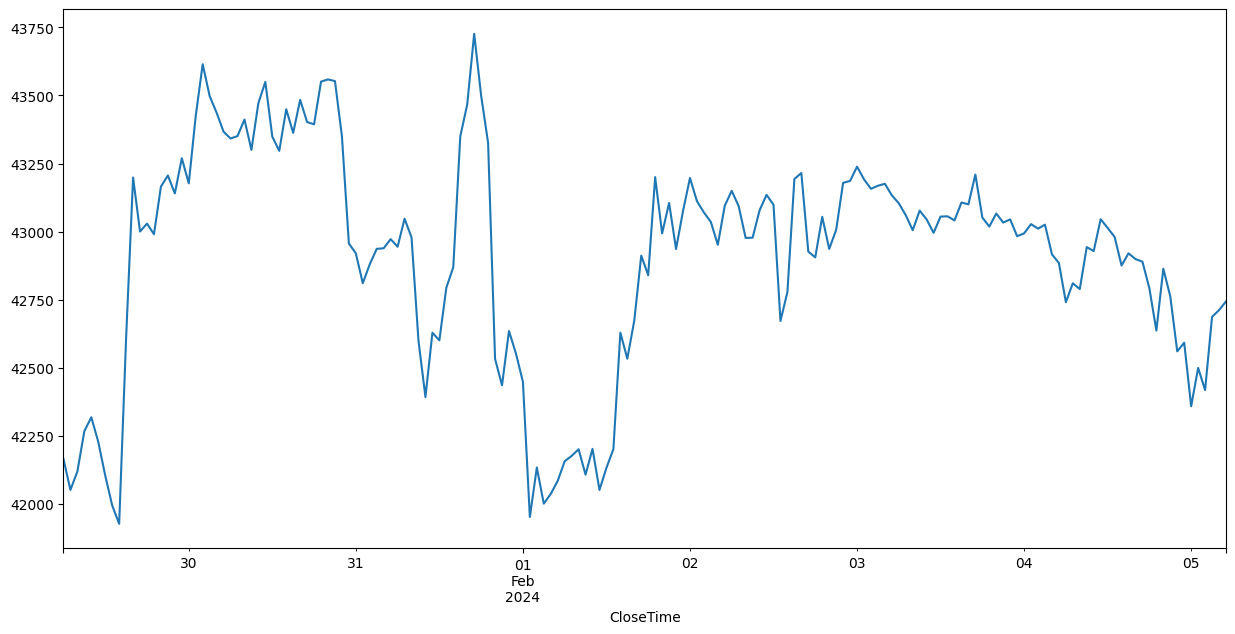

In [15]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-29 06:00:00,2264.24,2268.70,2264.24,2266.69,35.284740
2024-01-29 07:00:00,2266.70,2270.52,2258.91,2259.06,66.385043
2024-01-29 08:00:00,2259.06,2263.85,2254.65,2263.83,86.802991
2024-01-29 09:00:00,2263.41,2272.01,2255.15,2272.01,177.469069
2024-01-29 10:00:00,2272.01,2276.25,2269.66,2274.99,63.381499


<Axes: xlabel='CloseTime'>

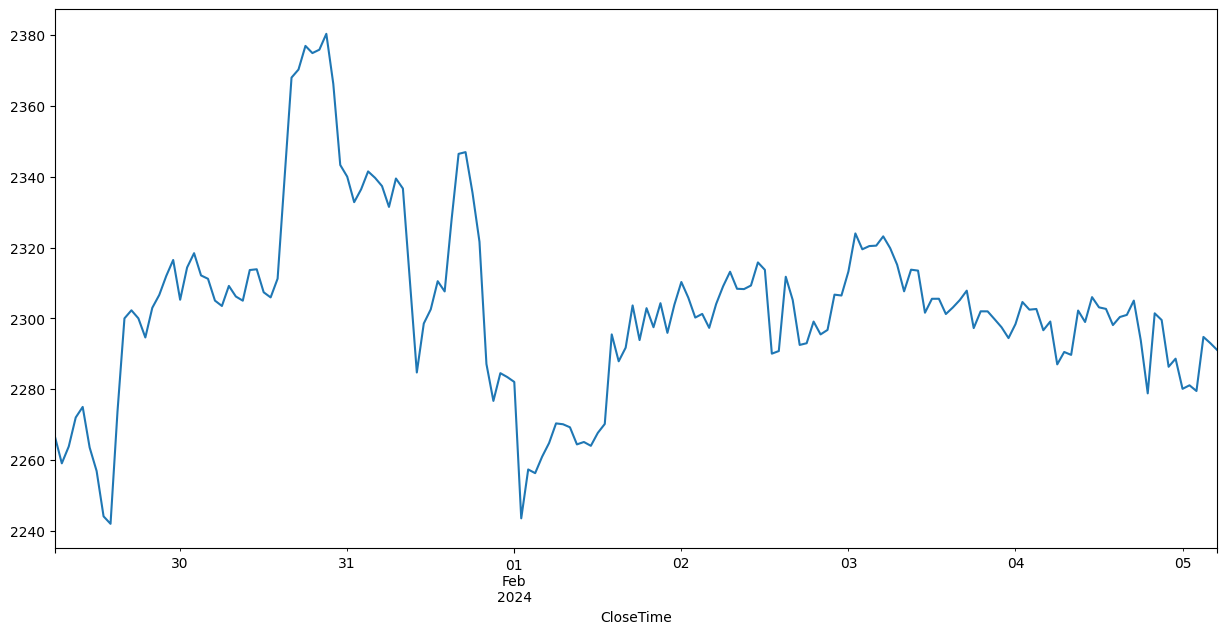

In [17]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [18]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-29 06:00:00,2264.24,2268.70,2264.24,2266.69,35.284740
2024-01-29 07:00:00,2266.70,2270.52,2258.91,2259.06,66.385043
2024-01-29 08:00:00,2259.06,2263.85,2254.65,2263.83,86.802991
2024-01-29 09:00:00,2263.41,2272.01,2255.15,2272.01,177.469069
2024-01-29 10:00:00,2272.01,2276.25,2269.66,2274.99,63.381499


# Generating interactive plots using the Bokeh library

In [26]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import Legend

In [20]:
output_notebook()

### Bitcoin Plot

In [32]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

btc_line = p1.line(btc.index, btc['ClosePrice'], color='#f2a900', line_width=2, legend_label="Bitcoin")




p1.legend.location = "top_left"
p1.legend.click_policy="hide"

show(p1)


### Eth Plot

In [31]:
p2 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p2.grid.grid_line_alpha = 0.3
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'

eth_line = p2.line(eth.index, eth['ClosePrice'], color='#A6CEE3', line_width=2, legend_label="Ethereum")



p2.legend.location = "top_left"
p2.legend.click_policy="hide"

show(p2)


### Writing and saving files into seperate spreadsheets

In [33]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [34]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [35]:
eth.to_excel(writer, sheet_name='Ether')

Saving

In [36]:
writer.save()

<ipython-input-36-16d93d5523a4>:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
